____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Curso I5521 - Turno sabado mañana__<br/>
__Elaborado por: Martin Palazzo__
____

# clase_02: EDA : Flujo Vehicular

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\Manuko\\Desktop\\Python\\Ciencia de datos\\Clase 2.2'

In [3]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: B89F-B57C

 Directorio de C:\Users\Manuko\Desktop\Python\Ciencia de datos\Clase 2.2

24/09/2020  09:24 p.m.    <DIR>          .
24/09/2020  09:24 p.m.    <DIR>          ..
05/09/2020  10:19 a.m.    <DIR>          .ipynb_checkpoints
05/09/2020  10:13 a.m.             1.119 clusterai_2020_clase02_dataset_acero-consumo-series.csv
05/09/2020  10:13 a.m.             4.252 clusterai_2020_clase02_dataset_acero-exportaciones-series.csv
05/09/2020  10:13 a.m.             4.438 clusterai_2020_clase02_dataset_acero-importaciones-series.csv
05/09/2020  10:13 a.m.             6.418 clusterai_2020_clase02_dataset_acero-produccion-series.csv
05/09/2020  10:16 a.m.         7.077.973 clusterai_2020_clase02_dataset_ny_airbnb.csv
24/09/2020  09:24 p.m.           404.976 clusterai_2020_clase02_eda_aceros_combinando_tablas.ipynb
05/09/2020  10:25 a.m.           532.356 clusterai_2020_clase02_eda_airbnb.ipynb
05/09/2020  10:05

# Importamos dataset de Flujo Vehicular por autopistas AUSA, año 2018
El dataset en formato csv lo encontraran en https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-de-peaje-ausa. Guardamos el dataset importado como dataframe en "conteo_autos". Ver que utilizamos "parse_dates" en la columna **fecha** para indicarle a python que dicha columna contiene datos en formato fechas.

In [3]:
conteo_autos = pd.read_csv('flujo-vehicular-2018.csv', delimiter=',', parse_dates=['fecha'])

In [4]:
np.shape(conteo_autos)

(1573803, 12)

In [5]:
conteo_autos.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,cantidad_pasos
0,2018,2018-01-01,enero,Lunes,1,0,1,ALBERDI,Motos,Efectivo,Efectivo,3
1,2018,2018-01-01,enero,Lunes,1,0,1,ALBERDI,Liviano 2 ejes,Efectivo,Efectivo,198
2,2018,2018-01-01,enero,Lunes,1,0,1,ALBERDI,Pesado 2 ejes,Exento,Exento - Reglamento,2
3,2018,2018-01-01,enero,Lunes,1,0,1,ALBERDI,Liviano 2 ejes,Tag,Tag - Exento,3
4,2018,2018-01-01,enero,Lunes,1,0,1,ALBERDI,Pesado 2 ejes,Tag,Tag - Patente Ocr,1


Observamos que podemos acceder a los elementos de la fecha de la columna "fecha" mediante el comando ".dt" y luego el dato de fecha que querramos acceder. month = mes, day = dia, year = año.

In [6]:
conteo_autos.fecha.dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: fecha, dtype: int64

## Análisis del mes de Enero
Analizaremos el flujo vehicular del mes de Enero en las autopisats AUSA

In [7]:
# filtramos "conteo_autos" por el mes enero de la columna "mes"
flujo_enero = conteo_autos.loc[conteo_autos.mes == 'enero']

In [8]:
# revisamos las dimensiones del dataframe
flujo_enero.shape

(127711, 12)

### MinMax Scaler
Utlizaremos la funcion MinMaxScaler de scikit learn para transformar la columna "cantidad de pasos".

In [9]:
# importamos la funcion y la definimos bajo el nombre "scaler"
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Aplicamos el scaler en la columna "cantidad_pasos" del dataframe "flujo_enero" y la guardamos en una **nueva** columna que agregaremos al dataframe "flujo_enero". Esta nueva columna se llamará "cant_pasos_scal". De esta manera tendremos dos columnas, una con valores absolutos y otra con los valores procesados.

In [10]:
# aplicamos minmaxscaler a la columna "cantidad_pasos" y generamos una nueva columna "cant_pasos_scal" con los resultados
flujo_enero['cant_pasos_scal'] = scaler.fit_transform(flujo_enero[['cantidad_pasos']])

C:\Users\Manuko\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
# vemos como quedo el nuevo dataframe
flujo_enero.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,cantidad_pasos,cant_pasos_scal
0,2018,2018-01-01,enero,Lunes,1,0,1,ALBERDI,Motos,Efectivo,Efectivo,3,0.000434
1,2018,2018-01-01,enero,Lunes,1,0,1,ALBERDI,Liviano 2 ejes,Efectivo,Efectivo,198,0.042733
2,2018,2018-01-01,enero,Lunes,1,0,1,ALBERDI,Pesado 2 ejes,Exento,Exento - Reglamento,2,0.000217
3,2018,2018-01-01,enero,Lunes,1,0,1,ALBERDI,Liviano 2 ejes,Tag,Tag - Exento,3,0.000434
4,2018,2018-01-01,enero,Lunes,1,0,1,ALBERDI,Pesado 2 ejes,Tag,Tag - Patente Ocr,1,0.000000


# Feature Engineering: crear nuevas features

Observamos que la columna "tipo_vehiculo" describe a cada registro (paso por cabina de peaje) por el tipo de vehiculo. Con el countplot de seaborn observamos la cantidad de registros que hay de cada tipo de vehiculo en esta columna. Nos servira crear dummie features de esta columna para poder considerar a cada tipo de vehiculo como una feature que esta "activada o desactivada" con 0 o 1.

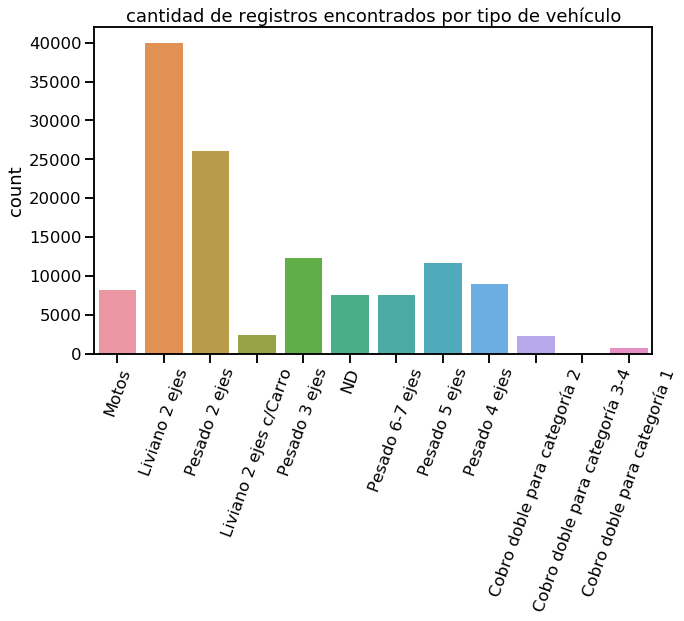

In [12]:
sns.set_context("talk", font_scale=1)
plt.figure(figsize=(10,6))
sns.countplot(flujo_enero.tipo_vehiculo.values)
plt.title("cantidad de registros encontrados por tipo de vehículo")
plt.xticks(rotation=70)
plt.show()

**Feature "tipo_vehiculo"**: queremos crear features que caractericen el tipo de vehiculo. Para eso ralizaremos una transformacion de dummies con la columna "tipo_vehiculo" utilizando la función "get_dummies" de pandas.

In [13]:
# guardamos los resultados de get_dummies en un nuevo dataframe "categorias"
categorias = pd.get_dummies(flujo_enero.tipo_vehiculo)
categorias.head(3)

,Cobro doble para categoría 1,Cobro doble para categoría 2,Cobro doble para categoría 3-4,Liviano 2 ejes,Liviano 2 ejes c/Carro,Motos,ND,Pesado 2 ejes,Pesado 3 ejes,Pesado 4 ejes,Pesado 5 ejes,Pesado 6-7 ejes
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0


Por medio del comando "pd.concat() concatenamos las tablas "flujo_enero" y "categorias" generando un nuevo dataframe llamado "flujo_enero_cats".

In [14]:
# aplicamos pd.concat() para unir ambos dataframes por columnas (axis = 1)
flujo_enero_cats = pd.concat([flujo_enero, categorias], axis = 1)
flujo_enero_cats.head(3)

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,...,Cobro doble para categoría 3-4,Liviano 2 ejes,Liviano 2 ejes c/Carro,Motos,ND,Pesado 2 ejes,Pesado 3 ejes,Pesado 4 ejes,Pesado 5 ejes,Pesado 6-7 ejes
0,2018,2018-01-01,enero,Lunes,1,0,1,ALBERDI,Motos,Efectivo,...,0,0,0,1,0,0,0,0,0,0
1,2018,2018-01-01,enero,Lunes,1,0,1,ALBERDI,Liviano 2 ejes,Efectivo,...,0,1,0,0,0,0,0,0,0,0
2,2018,2018-01-01,enero,Lunes,1,0,1,ALBERDI,Pesado 2 ejes,Exento,...,0,0,0,0,0,1,0,0,0,0


# Correlación entre estaciones

Armamos una tabla pivote con las estaciones como columnas y los dias de la semana como renglones (indices).

In [20]:
flujo_tabla = pd.pivot_table(data = flujo_enero_cats, values = ['cantidad_pasos'], index = ['dia'], columns = ['estacion'], aggfunc= np.sum, )

In [16]:
flujo_tabla.cantidad_pasos.head()

estacion,ALBERDI,AVELLANEDA,DELLEPIANE LINIERS,DELLEPIANE LINIERSLEPIANE CENTRO,ILLIA,RETIRO,SALGUERO,SARMIENTO
dia,,,,,,,,
Domingo,33255,356990,116873,128511,218505,12319,3789,5229
Jueves,65302,594554,175953,183141,392612,25041,8372,9569
Lunes,68776,644057,184236,205809,417124,27463,7652,8799
Martes,79131,709054,208562,216049,467050,30528,9413,10943
Miércoles,79770,736344,213785,228448,486644,30722,10093,11518


Con el comando .corr() vemos como evolucionan par-a-par el flujo de vehiculos por estacion durante los dias de la semana.

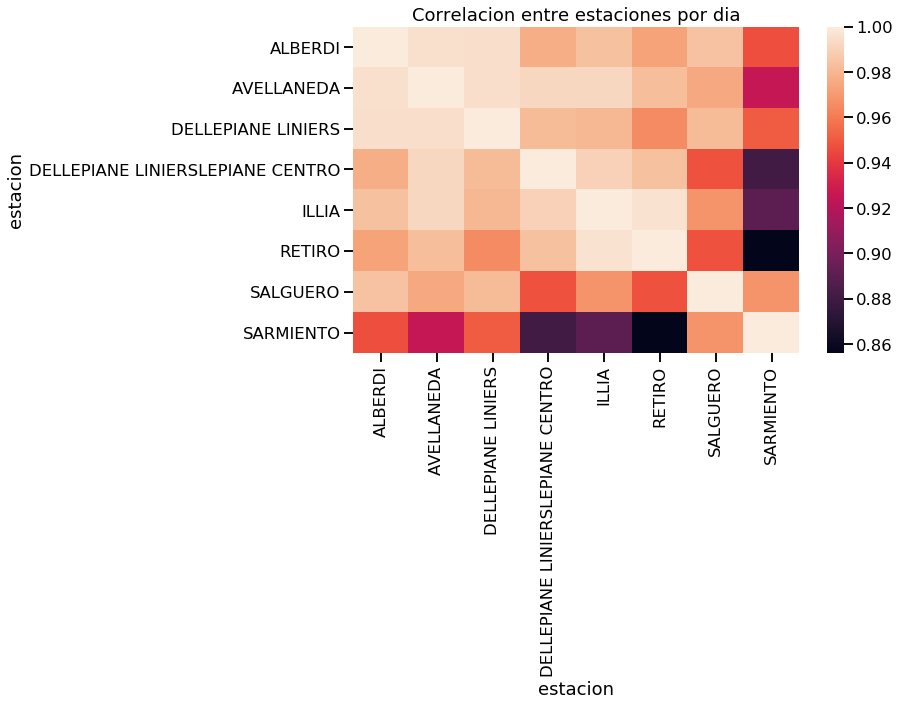

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(flujo_tabla.cantidad_pasos.corr())
plt.title("Correlacion entre estaciones por dia")
plt.show()

Podemos aplicar un grafico de PairPlot de seaborn para visualizar tambien la relación entre cada par de estaciones. Observamos que en general la co-relación es lineal positiva.

<Figure size 1440x1296 with 0 Axes>

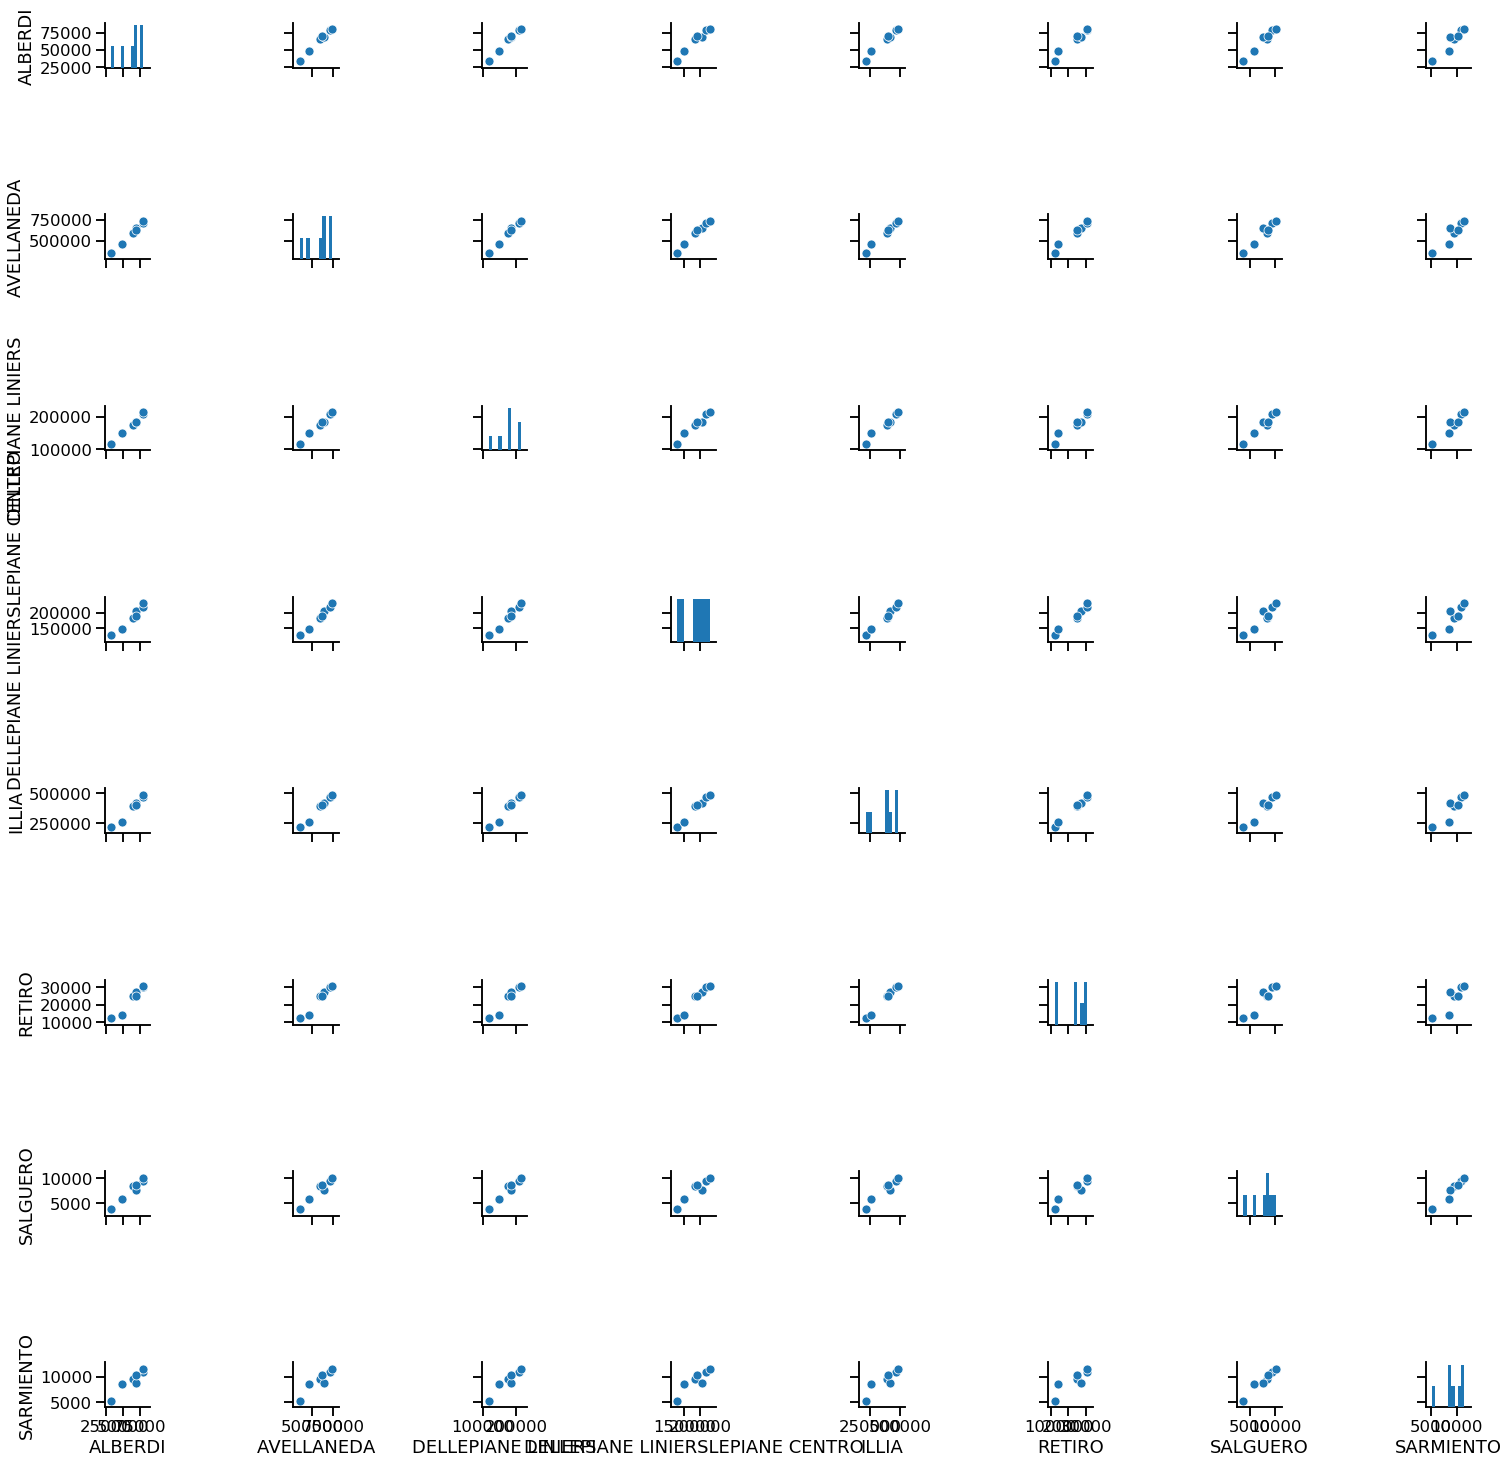

In [18]:
plt.figure(figsize=(20,18))
sns.pairplot(flujo_tabla.cantidad_pasos)
plt.xticks(rotation=70)
plt.show()

## Desafío 01: 
Determinar que estación es la que mas flujo vehicular tiene durante el mes de enero.

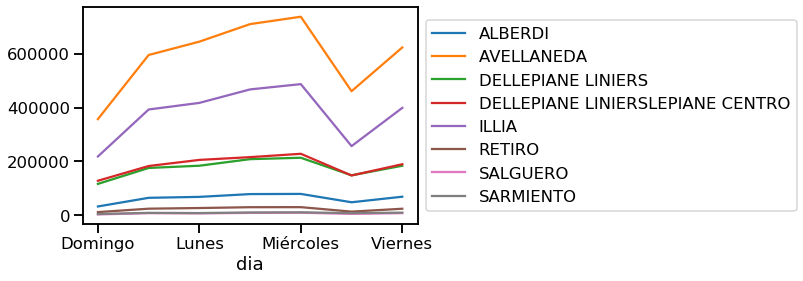

In [22]:
##### Desarrollar codigo aqui #####
flujo_tabla.cantidad_pasos.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [21]:
##### Desarrollar codigo aqui #####
flujo_tabla2 = pd.pivot_table(data = flujo_enero_cats, values = ['cantidad_pasos'], index = ['mes'], columns = ['estacion'], aggfunc= np.sum, )
flujo_tabla2.cantidad_pasos.head()

estacion,ALBERDI,AVELLANEDA,DELLEPIANE LINIERS,DELLEPIANE LINIERSLEPIANE CENTRO,ILLIA,RETIRO,SALGUERO,SARMIENTO
mes,,,,,,,,
enero,444456,4124059,1232244,1299858,2637435,165042,53639,64952


## Desafío 02: 
De la estación con mayor flujo vehicular de enero, determinar que tipo de vehículo es el de mayor frecuencia.

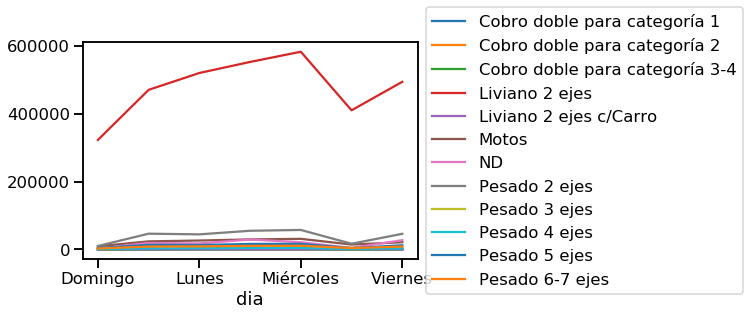

In [32]:
flujo_enero_avellaneda = flujo_enero.loc[flujo_enero.estacion == 'AVELLANEDA']
##### Desarrollar codigo aqui #####
flujo_tabla3 = pd.pivot_table(data = flujo_enero_avellaneda, values = ['cantidad_pasos'], index = ['dia'], columns = ['tipo_vehiculo'], aggfunc= np.sum, )
flujo_tabla3.cantidad_pasos.head()
flujo_tabla3.cantidad_pasos.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [29]:
avellaneda=flujo_enero.groupby('estacion').get_group('AVELLANEDA')
avellaneda.groupby('tipo_vehiculo')['cantidad_pasos'].agg(['sum']).sort_values(by='sum',ascending=False)\
.style.highlight_max(color='#add8e6')
##### Desarrollar codigo aqui #####
##### Desarrollar codigo aqui #####
##### Desarrollar codigo aqui #####

,sum
tipo_vehiculo,
Liviano 2 ejes,3358480
Pesado 2 ejes,276311
Motos,155509
ND,121408
Pesado 5 ejes,79218
Pesado 6-7 ejes,53957
Pesado 3 ejes,51774
Pesado 4 ejes,21929
Liviano 2 ejes c/Carro,3212


## Desafío 03: 
Realizar una matriz de correlación entre los tipos de vehículos en función de los días de la semana. ¿Cuáles son los tipos de vehículos menos correlacionados?

In [33]:
flujo_tabla4 = pd.pivot_table(data = flujo_enero_cats, values = ['cantidad_pasos'], index = ['dia'], columns = ['tipo_vehiculo'], aggfunc= np.sum, )
flujo_tabla4.head()
##### Desarrollar codigo aqui #####
##### Desarrollar codigo aqui #####

cantidad_pasos                               \
tipo_vehiculo Cobro doble para categoría 1 Cobro doble para categoría 2   
dia                                                                       
Domingo                                 34                          773   
Jueves                                 164                         1112   
Lunes                                  147                         1143   
Martes                                 178                         1393   
Miércoles                              197                         1388   

                                                             \
tipo_vehiculo Cobro doble para categoría 3-4 Liviano 2 ejes   
dia                                                           
Domingo                                    5         796226   
Jueves                                     9        1205871   
Lunes                                     14        1313792   
Martes                                    14        1419424   
Miércoles                                 17        1491801   

                                                                  \
tipo_vehiculo Liviano 2 ejes c/Carro  Motos     ND Pesado 2 ejes   
dia                                                                
Domingo                          826  20180  10796         25690   
Jueves                           665  61381  31757         95074   
Lunes                            781  63407  32183         92523   
Martes                           941  74417  49878        113594   
Miércoles                        894  77205  34952        117764   

                                                                         
tipo_vehiculo Pesado 3 ejes Pesado 4 ejes Pesado 5 ejes Pesado 6-7 ejes  
dia                                                                      
Domingo                7796          2120          6954            4071  
Jueves                15825          6187         24439           12060  
Lunes                 16796          6721         23580           12829  
Martes                19127          8102         28863           14799  
Miércoles             19751          8438         29604           15313

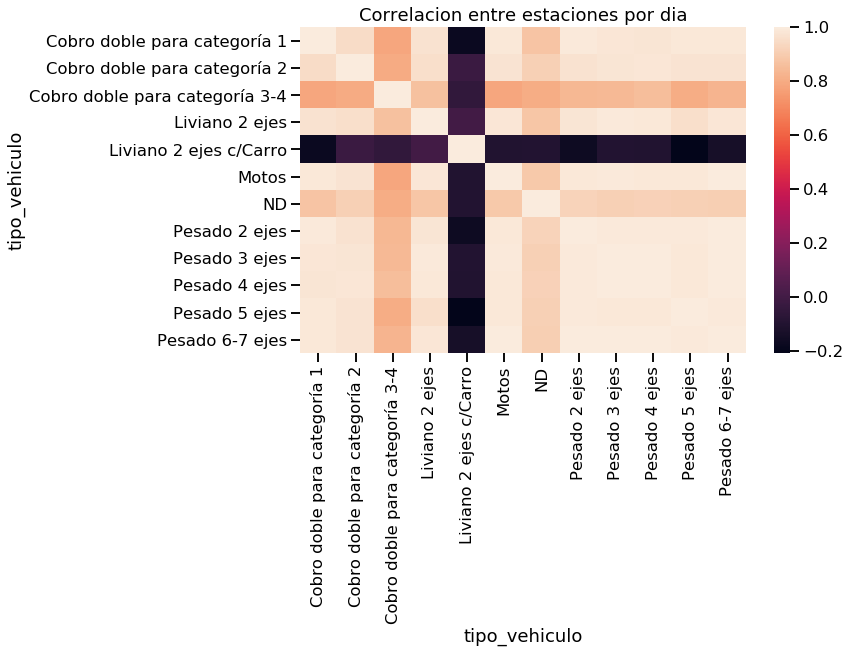

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(flujo_tabla4.cantidad_pasos.corr())
plt.title("Correlacion entre estaciones por dia")
plt.show()
##### Desarrollar codigo aqui #####
##### Desarrollar codigo aqui #####
##### Desarrollar codigo aqui #####